In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 20
n_hidden = 256 # num of neurons in hidden layer
n_input = 28*28 # input size 784

In [4]:
X = tf.placeholder(tf.float32, [None, 28,28,1]) # not using labels

In [7]:
W1 = tf.Variable(tf.random_normal([5,5,1,32], stddev = 0.01))
# padding = Same, keeps output size equal to input
L1 = tf.nn.conv2d(X, W1, strides = [1,2,2,1], padding = 'SAME') # 보폭이 반이돼서 14*14가 됨
# print(L1.shape)
L1 = tf.nn.relu(L1)
L2 = tf.reshape(L1, [-1, 14*14*32]) #직육면체를 펼치겠다!!!!!! (-1)은 뒤에 맞춰서 너가 알아서 사이즈 조절을 하란 뜻. 
W_encode = tf.Variable(tf.random_normal([14*14*32, 256], stddev = 0.01))
h = tf.matmul(L2, W_encode)

In [8]:
# typically the output size of encoder is smaller than input size of encode
# the output size of decoder must be the sasme as the input image size
output_batch = tf.shape(X)[0]
deconv_shape = tf.stack([output_batch, 28,28,1])
W_decode = tf.Variable(tf.random_normal([256,14*14*32]))
L3 = tf.matmul(h, W_decode)
W3 = tf.Variable(tf.random_normal([5,5,1,32]))
L3 = tf.reshape(L3, [-1,14,14,32])

decoder = tf.nn.conv2d_transpose(L3, W3,
                                output_shape = deconv_shape, strides = [1,2,2,1], padding = 'SAME')
decoder = tf.nn.sigmoid(decoder)

In [10]:
cost = tf.reduce_mean(tf.pow(X-decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
total_batch = int(mnist.train.num_examples/batch_size)
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs.reshape(-1,28,28,1)})
        
        total_cost += cost_val
        
    print('Epoch', '%04d' % (epoch +1), 
          'Avg.cost = ', '{:.4f}'.format(total_cost/total_batch))

Epoch 0001 Avg.cost =  0.0144
Epoch 0002 Avg.cost =  0.0051
Epoch 0003 Avg.cost =  0.0047
Epoch 0004 Avg.cost =  0.0041
Epoch 0005 Avg.cost =  0.0044
Epoch 0006 Avg.cost =  0.0042
Epoch 0007 Avg.cost =  0.0040
Epoch 0008 Avg.cost =  0.0039
Epoch 0009 Avg.cost =  0.0038
Epoch 0010 Avg.cost =  0.0038
Epoch 0011 Avg.cost =  0.0037
Epoch 0012 Avg.cost =  0.0037
Epoch 0013 Avg.cost =  0.0036
Epoch 0014 Avg.cost =  0.0036
Epoch 0015 Avg.cost =  0.0035
Epoch 0016 Avg.cost =  0.0035
Epoch 0017 Avg.cost =  0.0035
Epoch 0018 Avg.cost =  0.0035
Epoch 0019 Avg.cost =  0.0034
Epoch 0020 Avg.cost =  0.0034


In [19]:
n = 4
canvas_orig = np.empty((28*n, 28*n))
canvas_recon = np.empty((28*n, 28*n))
for i in range(n):
    #Mnist test set
    batch_x, _ = mnist.test.next_batch(n) # 4*784
    #batch_x, batch_y = mnist.test.next_batch(n) # 4*784
    #batch_y = np.argmax(batch_y, axis = 1)
    #print(batch_y)
    #Encode and decode the digit image
    g = sess.run(decoder, feed_dict = {X: batch_x.reshape(-1,28,28,1)})
    
    
    #Display original imgages
    for j in range(n):
        #Draw the generated digits
        canvas_orig[i * 28:(i+1) * 28, j * 28:(j+1) * 28] = batch_x[j].reshape([28,28])
    #Display reconstructed images
    for j in range(n):
        #Draw the generated digits
        canvas_recon[i * 28:(i+1) * 28, j * 28:(j+1) * 28] = g[j].reshape([28,28])

Origianl Images


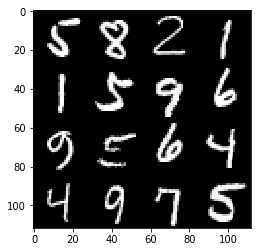

Reconstructed Images


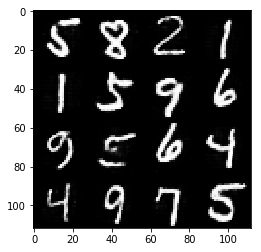

In [20]:
print("Origianl Images")
#plt.imshow(canvas_orig, origin="upper", cmap = "gray")
plt.imshow(canvas_orig, origin="upper", cmap = "gray")
plt.show()

print("Reconstructed Images")
plt.imshow(canvas_recon, origin = "upper", cmap = "gray")
plt.show()